# Togetherflow
**Emergent agent motion dynamics in immersive rooms**

In this notebook, we implement Togetherflow, a computational cognitive model that characterizes the motion pattern of human agents in immersive rooms.

In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from functools import partial

np.set_printoptions(suppress=True)

In [3]:
# import tensorflow as tf
# import bayesflow as bf
# from bayesflow.simulation import Prior, Simulator, GenerativeModel

In [4]:
from initializations import initialize_agents, initialize_beacons
from influences import (
    rotation_influence,
)
from simulations import (
    look_at_beacon,
    move_to_beacon
)
from diagnostics import plot_rotation_influence

## Initializations

In [5]:
agent_positions, agent_rotations = initialize_agents()
beacon_positions = initialize_beacons()

## Influences

In [14]:
test_beacon_position = np.array([[10., 10.]], dtype=np.float32)

direction = rotation_influence(
    agent_positions[0], agent_rotations[0], test_beacon_position[0],
)
direction

0.9121295213699341

In [15]:
num_agents = len(agent_positions)
e = np.empty((num_agents, 2))
for i in range(num_agents):
    influence = rotation_influence(
        agent_positions[i], agent_rotations[i], 
        beacon_positions[0]
    )
    e[i, 0] = np.cos(influence)
    e[i, 1] = np.sin(influence)

e

array([[ 0.49963467,  0.86623622],
       [ 0.00657394,  0.99997839],
       [ 0.69394162, -0.72003127],
       [-0.52302855, -0.85231516],
       [ 0.45374823, -0.89112993],
       [ 0.48326438,  0.87547447],
       [-0.6391413 , -0.76908933],
       [-0.55705032,  0.83047874],
       [ 0.46031151,  0.88775746],
       [ 0.44007525, -0.8979609 ],
       [ 0.7496142 ,  0.66187502],
       [ 0.49961288, -0.86624879]])

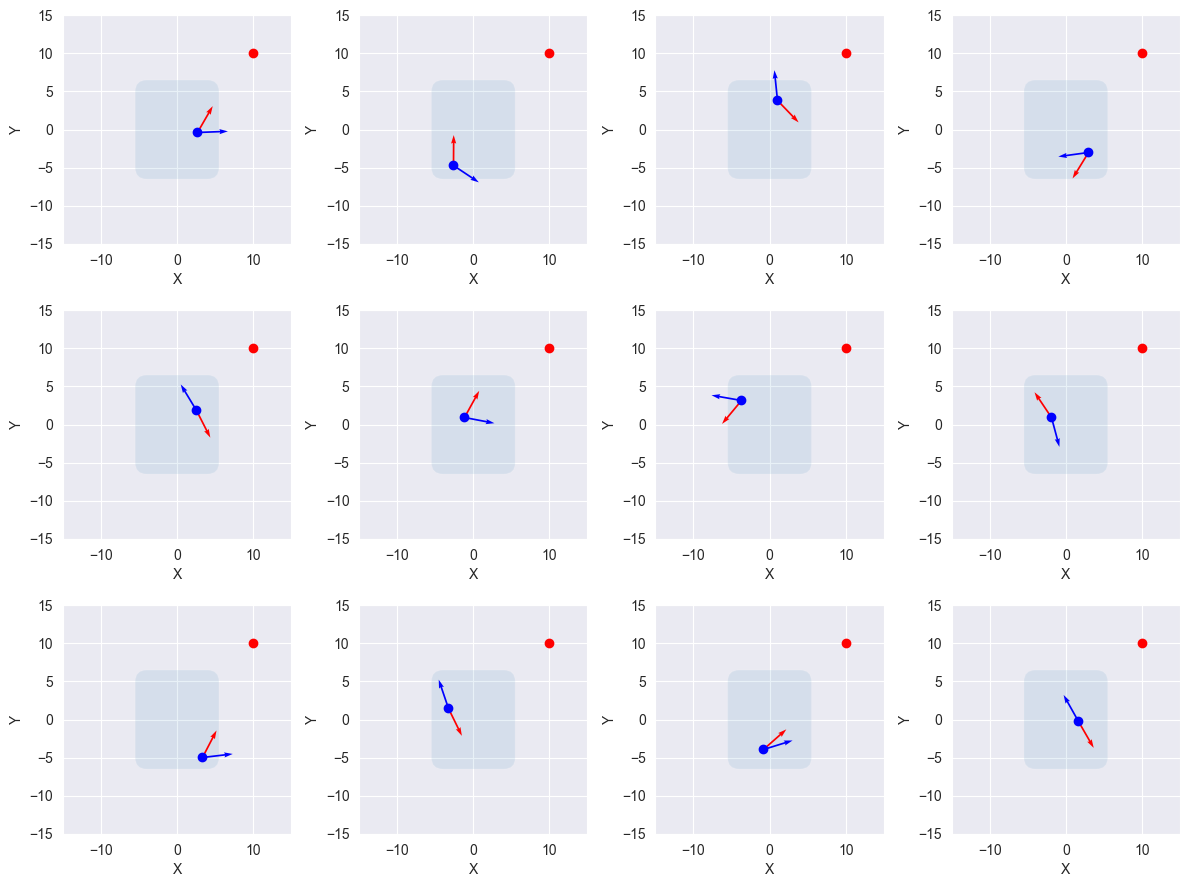

In [16]:
f = plot_rotation_influence(
    num_agents, 
    agent_positions, 
    agent_rotations, 
    test_beacon_position, 
    e
)

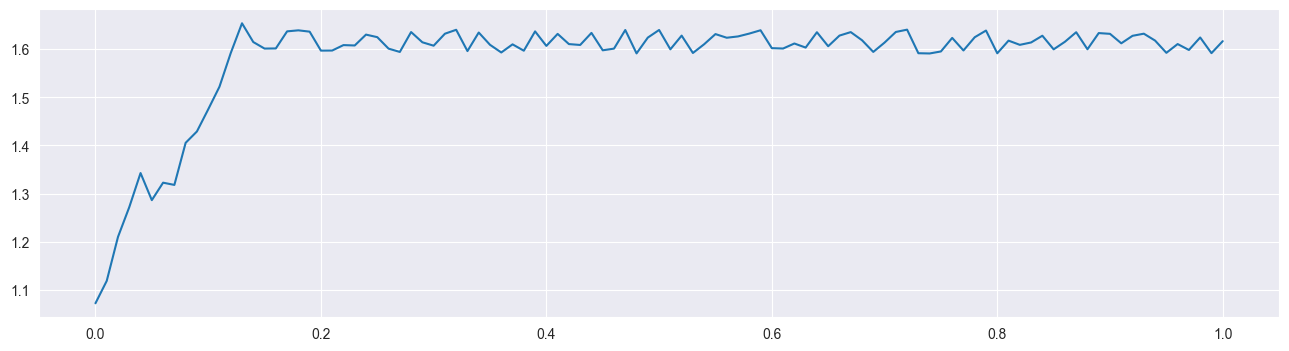

In [158]:
rotations = look_at_beacon(
    agent_rotation=agent_rotations[0],
    beacon_influence=beacon_positions[0],
    drift_rate=0.5 * np.pi,
    noise_amplitude=0.05,
    timesteps=101
)

f, ax = plt.subplots(1, 1, figsize=(16, 4))
ax = plt.plot(np.linspace(0, 1, 101), rotations)

In [55]:
type(agent_positions[0, 0])
type(beacon_positions[0, 0])

numpy.float32

In [65]:
positions = move_to_beacon(
    agent_position=agent_positions[0],
    beacon_position=beacon_positions[0]
)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mCannot unify array(float32, 2d, C) and array(float64, 1d, C) for 'positions.2', defined at C:\Users\Gerald Wong\Documents\Native\Permanent\TogetherFlow\notebooks\togetherflow\simulations.py (173)
[1m
File "simulations.py", line 173:[0m
[1mdef move_to_beacon(
    <source elided>

[1m        noise = noise_amplitude * (np.random.random(size=2) - 0.5)
[0m        [1m^[0m[0m
[0m
[0m[1mDuring: typing of assignment at C:\Users\Gerald Wong\Documents\Native\Permanent\TogetherFlow\notebooks\togetherflow\simulations.py (173)[0m
[1m
File "simulations.py", line 173:[0m
[1mdef move_to_beacon(
    <source elided>

[1m        noise = noise_amplitude * (np.random.random(size=2) - 0.5)
[0m        [1m^[0m[0m
